In [88]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/content/pulsar_stars.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


mengimpor beberapa library untuk menganalisis data dan visualisasi seperti Numpy, Pandas, Matplotlib, dan Searborn

In [89]:
import warnings

warnings.filterwarnings('ignore')

mengimpor modul warning atau peringatan, dan kemudian warning.filterwarnings('ignore') digunakan untuk mengatur bagaimana pesan peringata ditangani selama eksekusi program, lalu si 'ignore' ini digunakan sebagai argumen untuk memfilter pesan peringatan sehingga mereka tidak ditampilkan dilayar atau bisa dibilang peringatan akan diabaikan atau disembunyikan dan tidak akan mempengaruhi output dari program

In [90]:
data = '/content/pulsar_stars.csv'

df = pd.read_csv(data)

digunakan untuk membaca file CSV yang berisi data ke dalam sebuah DataFrame

In [91]:
# view dimensions of dataset

df.shape

(17898, 9)

untuk melihat dimensi dari dataset yang telah dimuat dalam DataFrame, memiliki 17898 baris dan 9 kolom

In [92]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


meilhat beberapa baris pertama dari dataset yang telah dimuat ke dalam DataFrame

In [93]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

untuk mengambil nama kolom dari DataFrame dan menyimpannya dalam variabel

In [94]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

untuk menghapus spasi yg ada di awal dan di akhir nama nama kolom dalam DataFrame

In [95]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

meilhat daftar nama nama kolom lagi tetapi sudah dihapus dari awal atau akhir

In [96]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

untuk mengganti nama nama kolom, sesuai yang diperintahkan

In [97]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

melihat nama nama kolom yang sudah diganti

In [98]:

df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

mengecek dan menghitung distribusi nilai pada kolom 'target class' dalam DataFrame

In [99]:

df['target_class'].value_counts()/np.float64(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

digunakan untuk melihat distribusi persentasi dari dari nilai dalam kolom 'target class' dalam DataFrame

In [100]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


untuk melihat ringkasan informasi tentang DataFrame termasuk informasi tentang jumlah baris dan kolom, tipe data setiap kolom, serta jumlah nilai yang tidak null dalam setiap kolom. Dengan melihat ringkasan informasi ini, kita jadi dapat memeriksa tipe data yg dimiliki oleh setiap kolom, memastikan bahwa tidak ada nilai yg hilang atau null

In [101]:
#mengecek dan menghitung jumlah nilai yg hilang

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

untuk memeriksa jumlah nilang yg hilang dalam setiap variabel kolom dalam DataFrame

In [102]:
#manghasilkan rangkuman statistik dari DataFrame dengan nilai nilai yg dibulatkan

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


untuk menghasilkan rangkuman statistik dari DataFrame, dimana nilai nilai numerik akan dibulatkan menjadi dua angka desimal

Text(0, 0.5, 'DM-SNR Skewness')

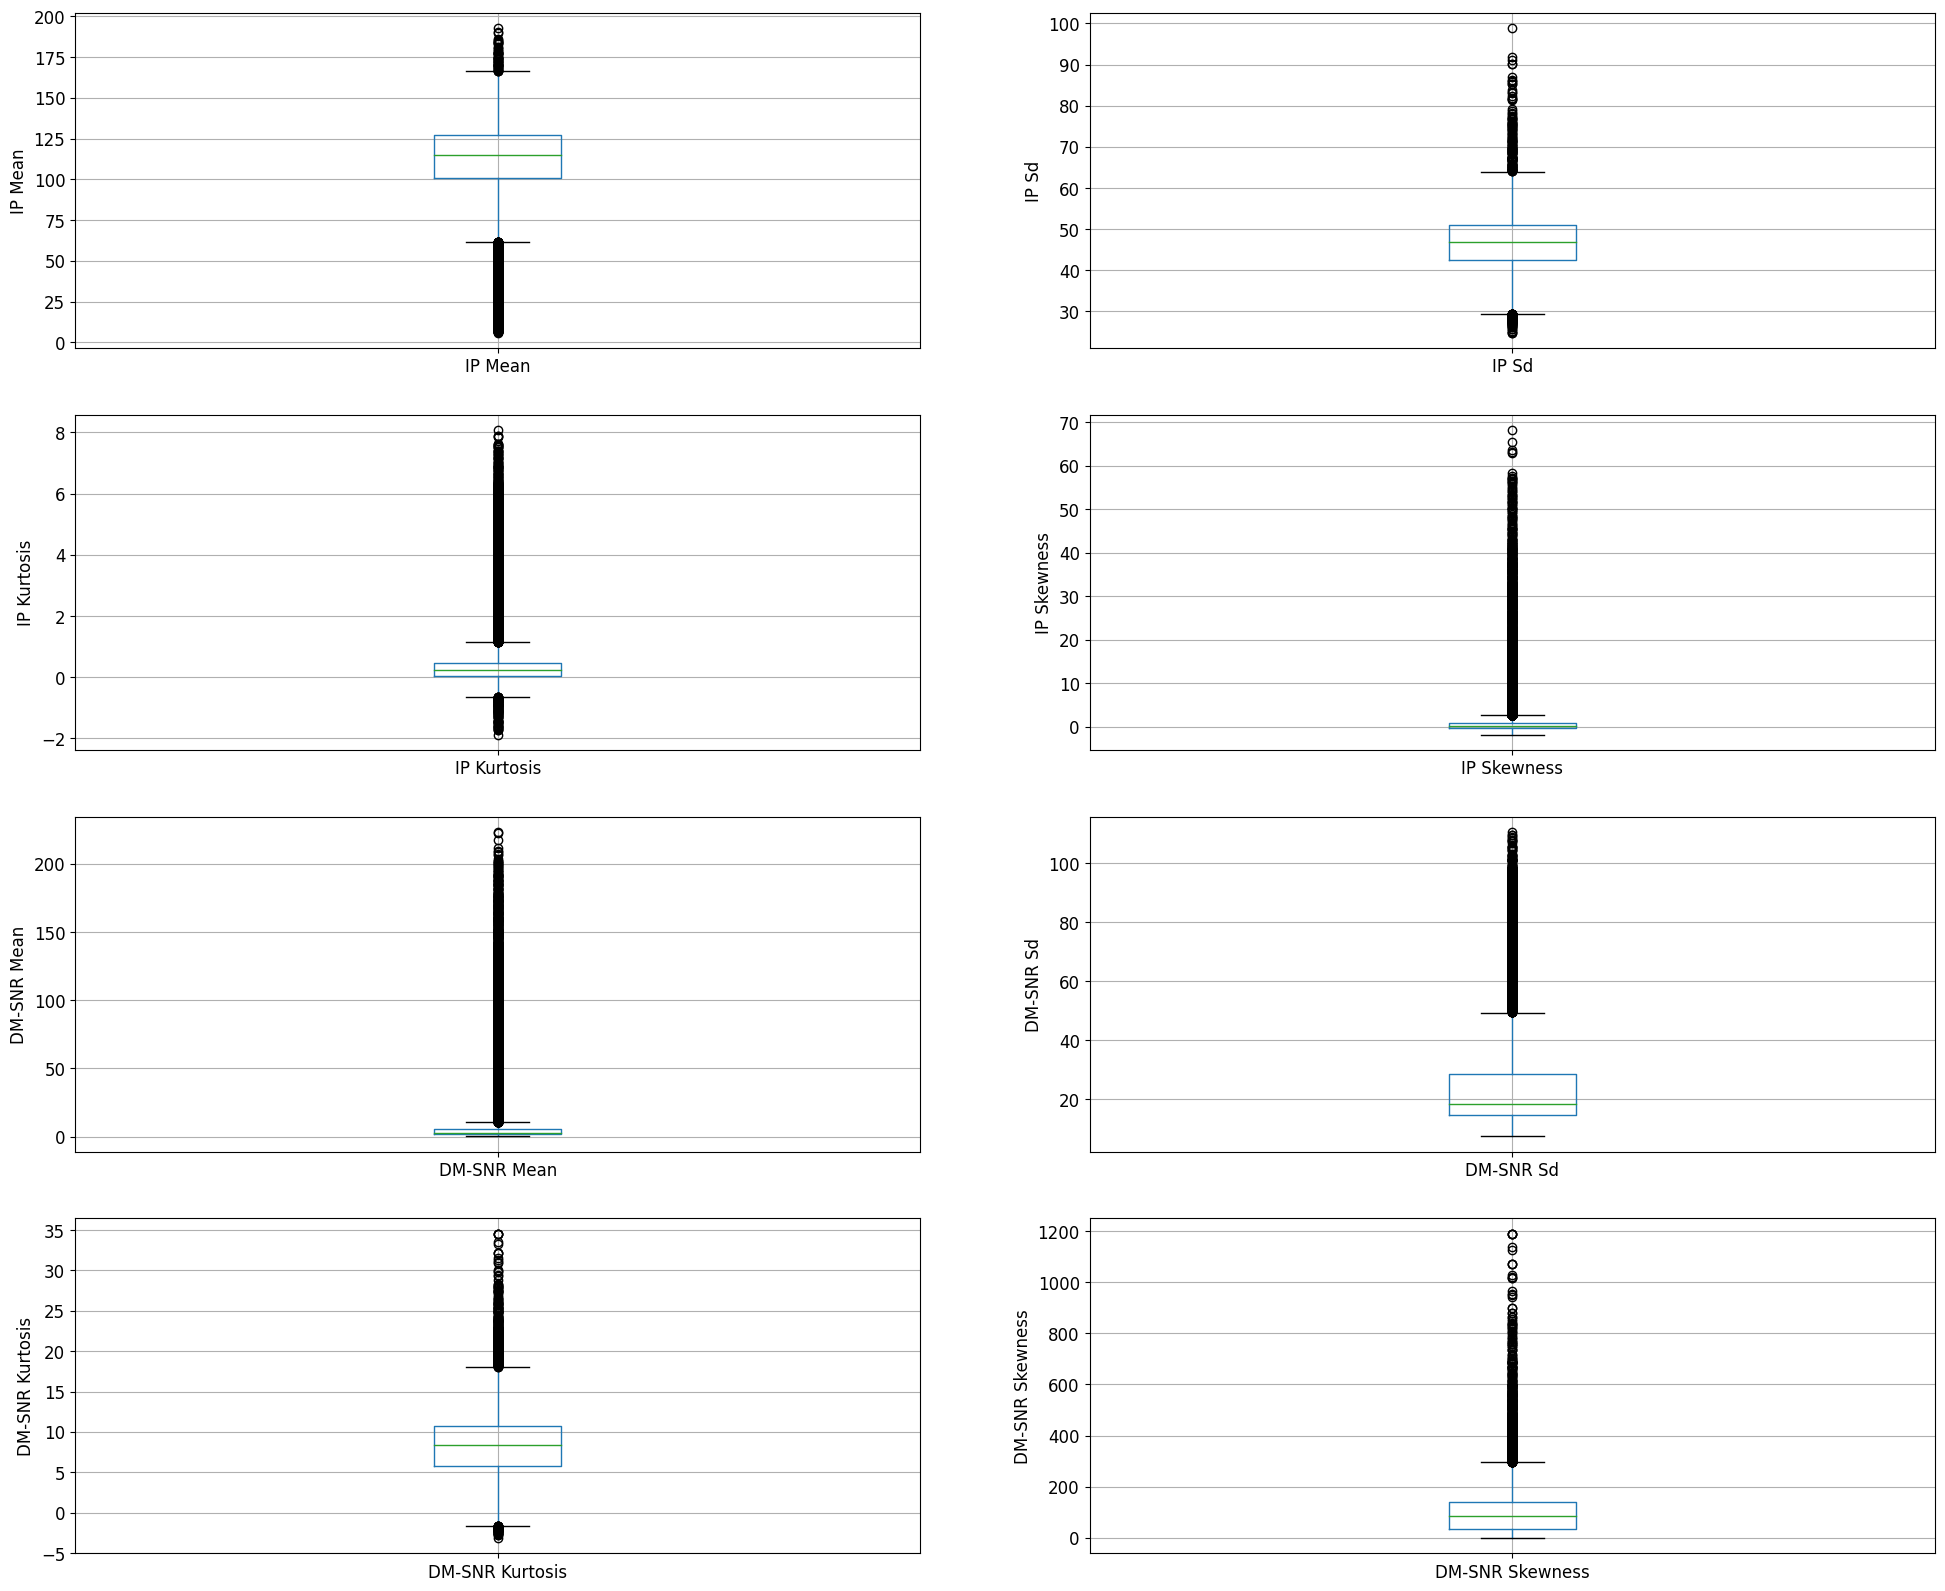

In [103]:
# draw boxplots to visualize outliers

#membuat gambar dengan ukuran yang ditentukan yaitu 24inch x20inch
plt.figure(figsize=(24,20))

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu y subplot
plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu y subplot
plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu y subplot
plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu y subplot
plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu y subplot
plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu y subplot
plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu y subplot
plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu y subplot
plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

membuat gambar baru dengan ukuran 24inch x 20inch, lalu menentukan letak subplot dalam gambar, dalam hal ini subplot akan ditempatkan dalam grid 4x2 dan 'i' menentukan posisi subplot. Lalu membuat diagram kotak (boxplot) untuk variabel numerik tertentu dalam DataFrame, lalu mengatur judul subplot menjadi string kosong

Text(0, 0.5, 'Number of pulsar stars')

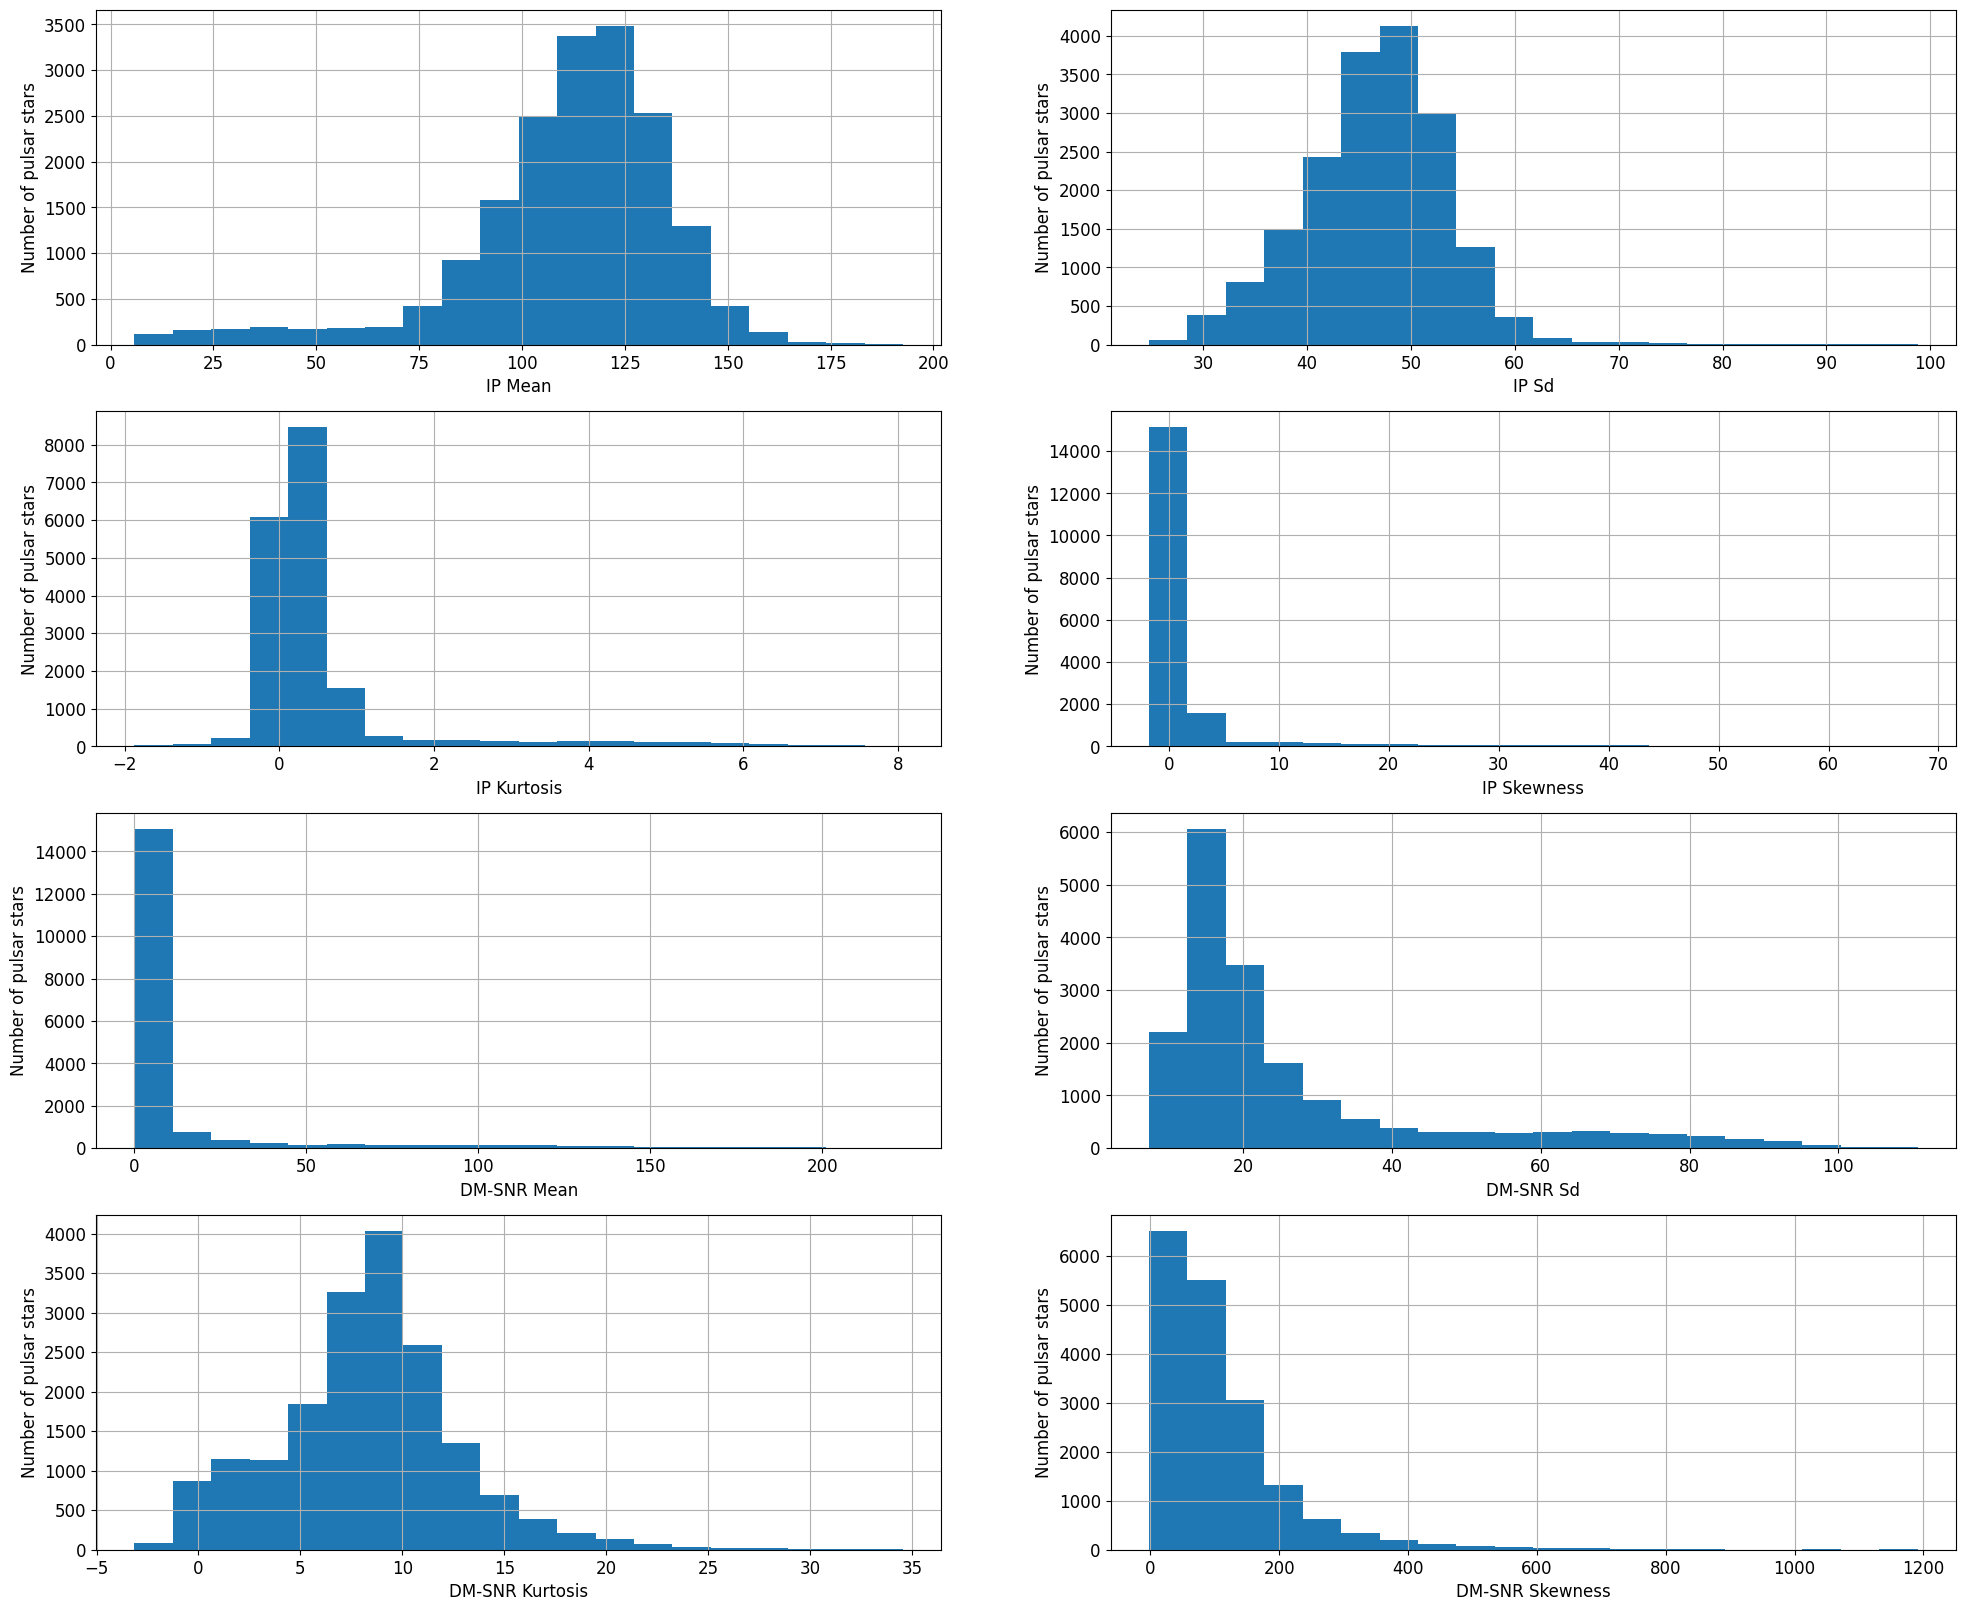

In [104]:
# plot histogram to check distribution

#membuat gambar baru dengan ukuran 24inch x 20 inch
plt.figure(figsize=(24,20))

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu x subplot
#mengatur label sumbu y subplot untuk menunjukkan jumlah frekuensi atau jumlah observasi
plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu x subplot
#mengatur label sumbu y subplot untuk menunjukkan jumlah frekuensi atau jumlah observasi
plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#mengatur label sumbu x subplot
#mengatur label sumbu y subplot untuk menunjukkan jumlah frekuensi atau jumlah observasi
plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')


#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#mengatur label sumbu x subplot
#mengatur label sumbu y subplot untuk menunjukkan jumlah frekuensi atau jumlah observasi
plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')


#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu x subplot
#mengatur label sumbu y subplot untuk menunjukkan jumlah frekuensi atau jumlah observasi
plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')


#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu x subplot
#mengatur label sumbu y subplot untuk menunjukkan jumlah frekuensi atau jumlah observasi
plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')


#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu x subplot
#mengatur label sumbu y subplot untuk menunjukkan jumlah frekuensi atau jumlah observasi
plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

#menentukan letak subplot dalam gambar, subplot akan ditempatkan dalam grid 4 baris dan 2 kolom
#membuat diagram kotak (boxplot)
#mengatur label sumbu x subplot
#mengatur label sumbu y subplot untuk menunjukkan jumlah frekuensi atau jumlah observasi
plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

membuat gambar baru dengan ukuran 24inch x 20inch, lalu menentukan letak subplot dalam gambar, dalam hal ini subplot akan ditempatkan dalam grid 4x2 dan 'i' menentukan posisi subplot. Lalu membuat histogram untuk variabel numerik tertentu dalam DataFrame

In [105]:
#membuat variabel x dan y
X = df.drop(['target_class'], axis=1)

y = df['target_class']

memisahkan variabel x dan y, dimana variabel x akan berisi fitur fitur data tanpa kolom target dan variabel y akan berisi target

In [106]:
#membagi dataset menjadi subset pelatihan dan subset pengujian

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

membagi dataset menjadi subset pelatihan dan pengujian, dimana x train akan berisi fitur fitur subset pelatihan dan x test akan berisi fitur fitur subset pengujian, begitu juga dengan y train dan y test

In [107]:
# check the shape of X_train and X_test
#menampilkan bentuk dari subset pelatihan dan subset pengujian
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [108]:
cols = X_train.columns

ini akan berisi daftar nama kolom yg ada dalam DataFrame X train

In [109]:
#mengimpor kelas StandardScaler dari modul preprocessing di scikit-learn.
from sklearn.preprocessing import StandardScaler
#membuat objek
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

fungsi fit transform dari scaler untuk melakukan penskalaan fitur pada subset pelatihan, dan fungsi transform pada scaler untuk melakukan penskalaan fitur pada subset pengujian

In [110]:
#membuat sebuah DataFrame baru
X_train = pd.DataFrame(X_train, columns=[cols])

menciptakan sebuah DataFrame baru X_train dari data yang telah diubah skala X_train, dengan menetapkan nama kolomnya menggunakan daftar nama kolom dari DataFrame asli X_train yang disimpan dalam variabel cols

In [111]:
#membuat sebuah DataFrame baru
X_test = pd.DataFrame(X_test, columns=[cols])

menciptakan sebuah DataFrame baru X_test dari data yang telah diubah skala X_test, dengan menetapkan nama kolomnya menggunakan daftar nama kolom dari DataFrame asli X_test yang disimpan dalam variabel cols

In [112]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


menghasilkan ringkasan statistik dari subset pelatihan yg baru

In [114]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
#mencetak akurasi model dengan menggu metrik
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


In [115]:
# instantiate classifier with linear kernel and C=100.0
#membuat objek SVC dengan parameter C yang ditetapkan sebagai 100.0. Parameter C mengontrol trade-off antara margin yang lebih besar dan penalti yang lebih besar terhadap kesalahan klasifikasi yang tidak sesuai
linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
#mencetak akurasi model dengan menggu metrik
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


In [116]:
#membuat objek SVC dengan karnel dan parameter C
svc=SVC(C=1000.0)


#melatih model SVC
svc.fit(X_train,y_train)


#membuat prediksi
y_pred=svc.predict(X_test)


#mencetak akurasi model dengan menggunakan metrik
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


In [117]:
#membuat objek SVC dengan karnel dan parameter C
linear_svc=SVC(kernel='linear', C=1.0)

#melatih model SVC
linear_svc.fit(X_train,y_train)

#membuat prediksi
y_pred_test=linear_svc.predict(X_test)

#mencetak akurasi model dengan menggunakan metrik
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


hasil cetakan akan menampilkan akurasi model SVM yg telah diperbarui dengan parameter yg ditentukan

In [118]:
#membuat objek SVC dengan karnel dan parameter C
linear_svc100=SVC(kernel='linear', C=100.0)


#melatih model SVC
linear_svc100.fit(X_train, y_train)


#membuat prediksi
y_pred=linear_svc100.predict(X_test)


#mencetak akurasi model dengan menggunakan metrik
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


In [119]:
#membuat objek SVC dengan karnel dan parameter C
linear_svc1000=SVC(kernel='linear', C=1000.0)


#melatih model SVC
linear_svc1000.fit(X_train, y_train)


#membuat prediksi
y_pred=linear_svc1000.predict(X_test)


#mencetak akurasi model dengan menggunakan metrik
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


In [120]:
#membuat prediksi
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

untuk membuat prediksi terhadap subset pelatihan dan menyimpan hasil prediksi tersebut dalam variabel

In [121]:
#mencetak akurasi model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


menampilkan akurasi model SVM pada data pelatihan

In [36]:
#mencetak skor model
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


menampilkan skor model SVM pada subset pelatihan dan subset pengujian

In [37]:
#menghitung jumlah nilai subset pelatihan

y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

untuk menghitung jumlah masing masing nilai dalam subset pengujian

In [38]:
#menghitung dan mencetak skor akurasi null

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


untuk menghitung dan mencetak skor akurasi null

In [39]:
#membuat objek SVC dengan kernel polinomial dan parameter C yang ditetapkan sebagai 1.0. Kernel polinomial digunakan untuk menentukan keputusan dengan cara mencari pemisah non-linear berdasarkan fitur polinomial
poly_svc=SVC(kernel='poly', C=1.0)


#melatih model SVC dengan kernel polinomial menggunakan data latih
poly_svc.fit(X_train,y_train)


#menggunakan model yang dilatih untuk membuat prediksi menggunakan data uji
y_pred=poly_svc.predict(X_test)


#mencetak akurasi model dengan menggunakan metrik
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9807


In [40]:
#membuat objek SVC dengan kernel polinomial dan parameter C
poly_svc100=SVC(kernel='poly', C=100.0)


#melatih model SVC dengan kernel polinomial menggunakan data latih
poly_svc100.fit(X_train, y_train)


#menggunakan model yang dilatih untuk membuat prediksi menggunakan data uji
y_pred=poly_svc100.predict(X_test)


#mencetak akurasi model dengan menggunakan metrik
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


In [41]:
#membuat objek SVC dengan kernel sigmoid dan parameter C
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


#melatih model SVC dengan kernel sigmoid menggunakan data latih
sigmoid_svc.fit(X_train,y_train)


#menggunakan model yang dilatih untuk membuat prediksi menggunakan data uji
y_pred=sigmoid_svc.predict(X_test)


#mencetak akurasi model dengan menggunakan metrik
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


In [42]:
#membuat objek SVC dengan kernel sigmoid dan parameter C
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)


#melatih model SVC dengan kernel sigmoid menggunakan data latih
sigmoid_svc100.fit(X_train,y_train)


#menggunakan model yang dilatih untuk membuat prediksi menggunakan data uji
y_pred=sigmoid_svc100.predict(X_test)


#mencetak akurasi model dengan menggunakan metrik
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


In [43]:
#mencetak dan menghitung matrik kebingungan
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


mencetak dan menghitung matrik kebingungan (confusion matrik) serta beberapa matrik evaluasi berdasarkan matriks tersebut

<Axes: >

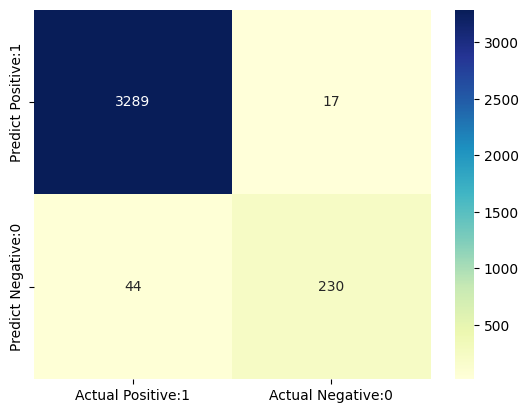

In [44]:
#membuat sebuah heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

untuk membuat sebuah heatmap yg menampilkan matriks kebingungan dalam bentuk visual, 'actual postive' untuk kelas positif dan 'actual negative' untuk kelas negatif

In [45]:
#mengimpor fungsi classification_report dari modul metrics di scikit-learn.
from sklearn.metrics import classification_report
#mencetak hasil laporan klasifikasi yang menyediakan metrik evaluasi
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



hasil laporan klasifikasi ini memberikan pemahaman yg lebih dalam tentang kinerja model dalam memprediksi setiapkelas dalam dataset

In [46]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

untuk klasifikasi biner, dimana TP adalah true positive, TN adalah true negative, FP adalah false positive, dan FN adalah false negative

In [47]:
# mencetak dan menghitung akurasi klasifikasi

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9830


In [48]:
#mencetak dan menghitung error klasifikasi

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0170


In [49]:
#mencetak dan menghitung presisi

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9949


In [50]:
#mencetak dan menghitung recall atau sensitivitas
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9868


In [51]:
#mencetak True Positive Rate dengan empat angka di belakang koma
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9868


In [52]:
#mencetak False Positive Rate dengan empat angka di belakang koma
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0688


In [53]:
#mencetak Spesifisitas dengan empat angka di belakang koma
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9312


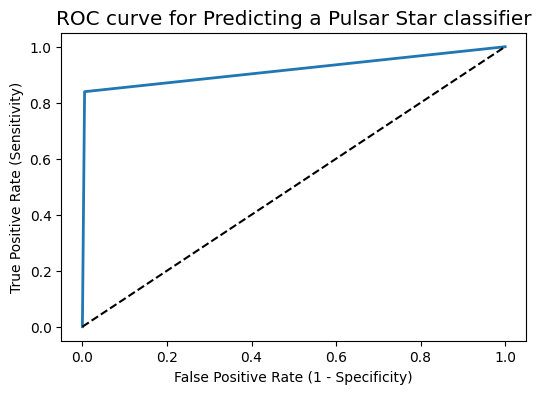

In [54]:
#plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

untuk membuat kurva ROC (Receiver Operating Characterictic) yg merupakan metode yg umum digunakan untuk mengevaluasi kinerja model klasifikasi, terutama dalam klasifikasi biner

In [55]:
#menghitung nilai ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


hasil cetakan memberi informasi tentang seberapa baik modeldapat membedakan antara kelas positif dan kelas negatif

In [56]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9756


untuk mengevaluasi model menggunakan metrik ROC AUC. Hasil cetakan memberikan nilai rata rata skor ROC AUC dari model setelah dilakukan validasi silang

In [57]:
#mengimpor kelas KFold dari modul model_selection di scikit-learn.
from sklearn.model_selection import KFold

#membuat objek KFold dengan jumlah lipatan (n_splits) sebanyak 5
kfold=KFold(n_splits=5, shuffle=True, random_state=0)

#membuat objek SVC dengan kernel linear.
linear_svc=SVC(kernel='linear')

#melakukan validasi silang
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

dengan melakukan validasi silang menggunakan skema lipatan, kita dapat mengukur kinerja secara lebih stabil

In [58]:
#mencetak skor validasi silang untuk model dengan kernel linear

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [59]:
#mencetak rata-rata skor validasi silang untuk model dengan kernel linear

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9789


In [60]:
#membuat objek SVC dengan kernel rbf
rbf_svc=SVC(kernel='rbf')

#melakukan validasi silang
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [61]:
#mencetak skor validasi silang untuk model dengan kernel rbf

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]


In [62]:
#mencetak rata-rata skor validasi silang untuk model dengan kernel rbf

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9725


In [63]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

untuk melakukan pencarian hyperparameter terbaik untuk model SVC. Setelah proses ini sleesai, lalu kita dapat mengakses hyperparameter terbaik dan skor evaluasi terkait dari objek 'grid search'

In [64]:
# examine the best model


#mencetak skor terbaik yang dicapai oleh model selama pencarian grid
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


#mencetak parameter yang memberikan hasil terbaik selama pencarian grid
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


#mencetak estimator yang dipilih oleh pencarian grid berdasarkan parameter terbaik yang ditemukan
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9793


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.3)


In [65]:
#mencetak skor hasil pencarian grid pada data pengujian

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9835
